In [1]:
import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test  = x_test.reshape((10000, 32, 32, 3))

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation = 'relu'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, 
                    validation_data=(x_test, y_test), epochs=40, verbose=1)

2022-01-26 15:02:00.768129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 15:02:00.771764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 15:02:00.772033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 15:02:00.772409: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

2022-01-26 15:02:02.979675: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 15:02:04.613832: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


196/196 [==============================] - 12s 45ms/step - loss: 1.8703 - accuracy: 0.2954 - val_loss: 1.6079 - val_accuracy: 0.3874
Epoch 2/40
196/196 [==============================] - 8s 41ms/step - loss: 1.5219 - accuracy: 0.4331 - val_loss: 1.4214 - val_accuracy: 0.4741
Epoch 3/40
196/196 [==============================] - 8s 41ms/step - loss: 1.3098 - accuracy: 0.5190 - val_loss: 1.2637 - val_accuracy: 0.5338
Epoch 4/40
196/196 [==============================] - 8s 41ms/step - loss: 1.1778 - accuracy: 0.5720 - val_loss: 1.2021 - val_accuracy: 0.5736
Epoch 5/40
196/196 [==============================] - 8s 41ms/step - loss: 1.0650 - accuracy: 0.6147 - val_loss: 1.0349 - val_accuracy: 0.6253
Epoch 6/40
196/196 [==============================] - 8s 41ms/step - loss: 0.9764 - accuracy: 0.6495 - val_loss: 1.0090 - val_accuracy: 0.6325
Epoch 7/40
196/196 [==============================] - 8s 41ms/step - loss: 0.8974 - accuracy: 0.6790 - val_loss: 0.8975 - val_accuracy: 0.6815
Epoch 8/4

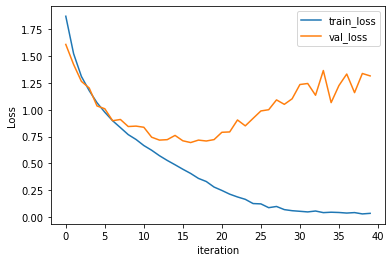

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

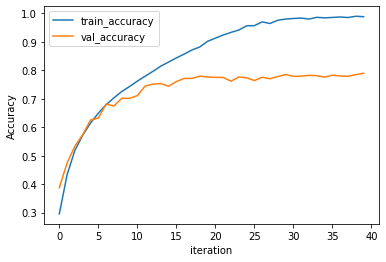

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()